# Projeto 1 - Ciência dos Dados

Nome: João Pedro Varella

## Hipótese

Países participantes da União Europeia, ao passar por uma grande crise econômica como a crise dos Tigres Asiáticos de 1997 e a Crise de 2008, sofrem um impacto significativamente menor em comparação com os países do Mercosul durante o mesmo período em relação a queda do PIB e diminuição da taxa de emprego.

## Explicação da hipótese e mecanismo

Uma crise econômica importante como a de 1997 ou a de 2008, sem dúvidas, causa um significativo impacto na economia de um país. Ao passar por uma grande crise como as citadas, é importante que um país consiga, por meio de auxílios e vantagens alfandegárias, se estabilizar durante o momento de fragilidade comercial com o resto do mundo.

Os países membros do Mercosul possuem certas vantagens comerciais que podem auxiliar durante um momento de crise. Dentre estes, estão: redução de impostos na comercialização entre membros do Mercosul (conhecido como imposto de importação); desenvolvimento de linhas de financiamento para comércio dentro do bloco (criação de linhas de crédito específicos para empresas que comercializem produtos dentro do bloco) e desburocratização e agilidade nos processos de importação e exportação.

Já a União Europeia, possui mecanismos como: Mercado comum, chamado também de mercado interno, o principal motor da economia europeia, pois permite a livre circulação de bens, serviços, capitais e pessoas entre os países membros; Moeda única, o euro, apesar de não ser adotado por todos os países, é uma das principais moedas do mundo, o que facilita o comércio entre os Estados e torna o mercado único mais eficiente; além de proporcionar aos países, ajuda humanitária e promoção de direitos humanos.


Considerando esses fatos, seria natural que os países da União Europeia conseguissem se estabilizar mais efetivamente durante momentos de crise por apresentar mecanismos mais significativos. Ambas as crises, principalmente a de 2008, afetou muito intensamente a economia mundial e consequentemente afetar a taxa de emprego do país. 

https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1468-5965.2009.02029.x

https://www.investopedia.com/articles/economics/09/financial-crisis-review.asp

https://www1.folha.uol.com.br/fsp/dinheiro/fi30059908.htm

https://www.mercosur.int/pt-br/tarifa-externa-comum/

https://www.eurodicas.com.br/uniao-europeia/

https://www.sunoresearch.com.br/artigos/crise-asiatica/

https://mundoeducacao.bol.uol.com.br/geografia/crise-financeira-capitalismo.htm

### Imports ####

In [446]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Análise de dados

O primeiro passo do projeto é carregar os dois arquivos Excel: Com os dados de crescimento anual de PIB per capita e da taxa percentual de emprego para pessoas acima de 15 anos. A partir das duas tabelas, manusearemos os dados para que possamos encontrar bases para estudar a hipótese inicial.
Vale lembrar que não serão exibidas as tabelas iniciais para que não polua o arquivo e dificulte o carregamento do mesmo.

In [448]:
dados = pd.read_excel('gdp_per_capita_yearly_growth.xlsx')
dados_emprego = pd.read_excel('aged_15plus_employment_rate_percent.xlsx')

### Excluindo anos desnecessários 

O próximo passo é excluir os dados de anos irrelevantes. Levando em consideração que estudaremos somente as crises dos Tigres Asiáticos de 1997 e a Crise de 2008, excluiremos os dados para anos anteriores a 1996. Dessa forma, as novas tabelas de crescimento do PIB e de taxa de emprego possuirão apenas dados de 1996 a 2019.

In [449]:
dados_novos = dados.set_index('country')
dados_limpos = dados_novos.iloc[:,195:]

dados_novos_emp = dados_emprego.set_index('country')
dados_limpos_emp = dados_novos_emp.iloc[:,5:29]

### Inserindo classificação por bloco econômico

Para organizar melhor os dados, é importante categorizar os países por seus blocos econômicos (Mercosul, União Europeia, ou nenhum desses). A partir disso, será mais fácil visualizar os países de cada organização internacional.

- Para a tabela de crescimento anual do PIB:

In [450]:
paises_na_UE=[]
paises_no_mercosul=[]
paises_UE=["France", "Germany", "Belgium", "Italy", "Luxembourg", "Netherlands", "Denmark", "Ireland", "United Kingdom", "Greece", "Portugal", "Spain", "Austria", "Finland", "Sweden", "Hungary", "Cyprus", "Czech Republic", "Estonia", "Latvia", "Lithuania", "Malta", "Poland", "Slovak Republic", "Slovenia", "Bulgaria", "Romania", "Croatia"]
paises_mercosul=['Argentina', 'Brazil', 'Paraguay','Uruguay','Bolivia', 'Chile', 'Colombia', 'Ecuador', 'Peru', 'Guiana', 'Suriname']
for pais in dados['country']:
    if pais in paises_UE:
        paises_na_UE.append('Membro')
        paises_no_mercosul.append('-')
    elif pais in paises_mercosul:
        paises_na_UE.append('-')
        paises_no_mercosul.append('Membro')
    else:
        paises_na_UE.append('-')
        paises_no_mercosul.append('-')
dados_limpos['Mercosul']=paises_no_mercosul
dados_limpos['União Europeia']=paises_na_UE

/Users/varella/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/varella/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


- Para a tabela de taxa de emprego anual, utilizaremos o mesmo método para classificação dos países por bloco econômico:

In [451]:
paises_na_UE=[]
paises_no_mercosul=[]
paises_UE=["France", "Germany", "Belgium", "Italy", "Luxembourg", "Netherlands", "Denmark", "Ireland", "United Kingdom", "Greece", "Portugal", "Spain", "Austria", "Finland", "Sweden", "Hungary", "Cyprus", "Czech Republic", "Estonia", "Latvia", "Lithuania", "Malta", "Poland", "Slovak Republic", "Slovenia", "Bulgaria", "Romania", "Croatia"]
paises_mercosul=['Argentina', 'Brazil', 'Paraguay','Uruguay','Bolivia', 'Chile', 'Colombia', 'Ecuador', 'Peru', 'Guiana', 'Suriname']
for pais in dados_emprego['country']:
    if pais in paises_UE:
        paises_na_UE.append('Membro')
        paises_no_mercosul.append('-')
    elif pais in paises_mercosul:
        paises_na_UE.append('-')
        paises_no_mercosul.append('Membro')
    else:
        paises_na_UE.append('-')
        paises_no_mercosul.append('-')
dados_limpos_emp['Mercosul']=paises_no_mercosul
dados_limpos_emp['União Europeia']=paises_na_UE

/Users/varella/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/varella/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


### Selecionando apenas países que serão estudados

Utilizando as duas tabelas atualizadas na célula cima, devemos excluir os países que não serão estudados. Dessa forma, selecionaremos apenas quatro países (dois do Mercosul e dois da União Europeia). Para este projeto, utilizaremos apenas os dados de Bélgica, Brasil, Chile e Holanda.

Nesse caso, ambas as tabelas apresentarão a mesma estrutura, onde as linhas correspondem aos nomes dos 4 países selecionados; cada coluna corresponde a um ano e as duas últimas correspondem aos blocos Mercosul ou UE, nas quais um país é membro ou não.

In [452]:
dados_escolhidos = dados_limpos.loc[['Belgium','Brazil','Chile','Netherlands']]
dados_escolhidos

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,Mercosul,União Europeia
country,,,,,,,,,,,,,,,,,,,,,
Belgium,0.923,3.13,1.70,3.230,3.47,0.507,1.310,0.822,2.81,1.51,...,-0.984,-0.351,0.955,0.781,0.654,0.723,0.764,0.857,-,Membro
Brazil,1.260,1.89,-1.22,-0.529,3.03,-0.416,1.350,-0.256,4.33,1.59,...,0.220,1.370,0.952,1.810,2.190,2.360,2.590,2.790,Membro,-
Chile,5.920,5.18,1.90,-1.980,3.26,2.200,1.060,2.820,5.12,5.26,...,4.510,3.310,2.730,3.150,3.440,3.710,3.720,3.720,Membro,-
Netherlands,3.360,4.05,3.64,4.350,3.46,1.460,-0.226,0.143,2.17,1.59,...,-1.610,-1.050,0.562,1.390,1.530,1.620,1.730,1.840,-,Membro


In [453]:
dados_escolhidos_emp = dados_limpos_emp.loc[['Belgium','Brazil','Chile','Netherlands']]
dados_escolhidos_emp

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,Mercosul,União Europeia
country,,,,,,,,,,,,,,,,,,,,,
Belgium,45.6,45.9,46.0,47.4,48.8,47.6,47.4,47.1,48.0,48.7,...,49.1,49.0,49.0,48.9,49.1,49.4,49.6,49.5,-,Membro
Brazil,59.6,59.2,58.7,58.5,58.6,59.2,60.0,59.7,60.9,60.8,...,59.7,59.7,59.7,58.7,56.4,55.2,55.9,56.0,Membro,-
Chile,51.5,51.9,52.2,50.3,49.5,49.5,49.3,49.7,50.9,50.9,...,57.8,58.1,58.1,58.2,58.0,58.0,58.1,58.1,Membro,-
Netherlands,55.2,56.9,58.3,59.5,61.1,62.1,62.5,61.8,61.3,61.3,...,60.8,59.8,59.3,59.7,59.9,60.4,60.9,61.0,-,Membro


### Criação das linhas temporais principais

#### Taxa de crescimento anual do PIB

Utilizando das tabelas geradas acima, é possível plotar uma linha temporal da taxa de crescimento anual do PIB para cada ano do intervalo escolhido. Por meio dela, é possível visualizar o comportamento do crescimento do PIB de cada país para todos os anos e assim, sendo possível visualizar o comportamento durante ambas as crises estudadas no projeto.

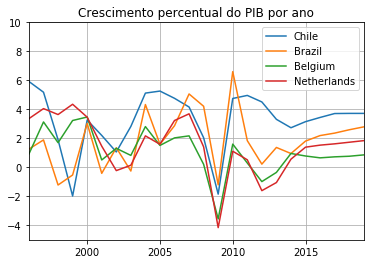

In [454]:
plt.plot(dados_escolhidos.iloc[2,:-2], label = 'Chile')
plt.plot(dados_escolhidos.iloc[1,:-2], label = 'Brazil')
plt.plot(dados_escolhidos.iloc[0,:-2], label = 'Belgium')
plt.plot(dados_escolhidos.iloc[3,:-2], label = 'Netherlands')
plt.title('Crescimento percentual do PIB por ano')
plt.legend(loc = 'upper right')
plt.axis([1996, 2019, -5,10])
plt.grid()

#### Taxa de emprego anual

Utilizando o mesmo método do gráfico anterior, criaremos uma segunda linha temporal onde exibiremos a taxa anual de empregados dos quatro países no intervalo escolhido.

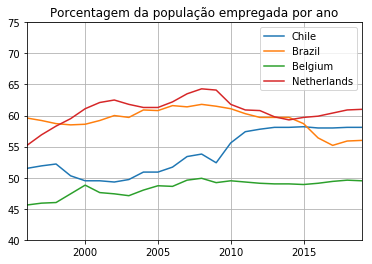

In [455]:
plt.plot(dados_escolhidos_emp.iloc[2,:-2], label = 'Chile')
plt.plot(dados_escolhidos_emp.iloc[1,:-2], label = 'Brazil')
plt.plot(dados_escolhidos_emp.iloc[0,:-2], label = 'Belgium')
plt.plot(dados_escolhidos_emp.iloc[3,:-2], label = 'Netherlands')
plt.title('Porcentagem da população empregada por ano')
plt.legend(loc = 'upper right')
plt.axis([1996, 2019, 40,75])
plt.grid()

## Estudo das Crises

Após obter os dados referentes ao PIB e à taxa de emprego em todos os anos, é necessário estudar separadamente as duas crises que ocorreram nesse período e o reflexo de cada uma delas na economia e na sociedade dos países escolhidos.

### Crise dos Tigres Asiáticos - 1997

A Crise dos Tigres Asiáticos de 1997 foi um período de recessão nos países no Sudeste Asiático que se destacavam por um rápido crescimento e desenvolvimento econômico. Sendo também conhecida como crise financeira asiática, o evento ganhou rapidamente escala mundial, afetando assim, economias de diversos países do mundo.

Essa crise ficou conhecida como a primeira grande crise dos mercados globalizados pois os impactos puderam ser sentidos por diversas nações do globo pois o mercado mundial já era globalizado.

Muitos economistas dizem que a crise teve início devido às políticas monetárias adotadas pelos Tigres Asiáticos. Ela teve início na Tailândia, e alguns meses depois, afetou a Bolsa de Hong Kong.

A crise financeira asiática levou a aumento dos problemas sociais devido a aumento nas taxas de desemprego dos países do Sudeste Asiático como Tailândia, Taiwan, Indonésia e Coreia do Sul, e a uma queda considerável da estabilidade econômica desses países.



#### Crescimento anual do PIB

Por meio de um recorte da linha temporal completa do crescimento do PIB anual, é possível estudar mais detalhadamente os efeitos da crise para os países em questão.

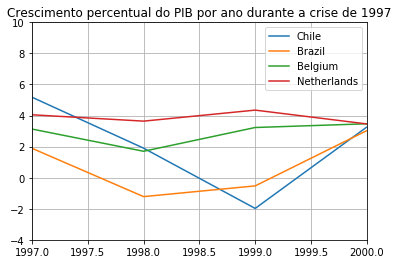

In [456]:
plt.plot(dados_escolhidos.iloc[2,:-2], label = 'Chile')
plt.plot(dados_escolhidos.iloc[1,:-2], label = 'Brazil')
plt.plot(dados_escolhidos.iloc[0,:-2], label = 'Belgium')
plt.plot(dados_escolhidos.iloc[3,:-2], label = 'Netherlands')
plt.title('Crescimento percentual do PIB por ano durante a crise de 1997')
plt.legend(loc = 'upper right')
plt.axis([1997, 2000, -4,10])
plt.grid()

Nesse gráfico, é possível constatar que os países do Mercosul sofreram um maior impacto durante a crise financeira asiática. No caso do Brasil, a bolsa brasileira desvalorizou 8,15% logo após uma queda de 10,4% na Bolsa de Hong Kong, o que fez com que o Brasil recorresse ao FMI. 

Por outro lado, os países da União Europeia foram pouco afetados pela crise, o que pode demonstrar que diferentemente dos países do Mercosul; no período da crise, os europeus possuíam uma menor dependência econômica dos Tigres Asiáticos. Por esse motivo, a recessão atingiu quase que de forma imperceptível a economia europeia.

#### Taxa de emprego

Utilizando o mesmo recorte temporal, analisaremos a influência da crise na taxa de emprego dos países.

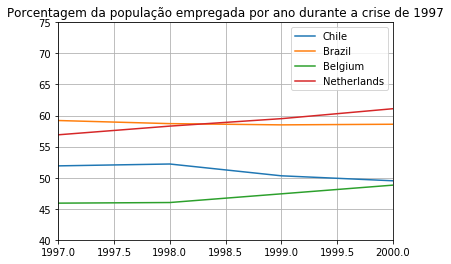

In [468]:
plt.plot(dados_escolhidos_emp.iloc[2,:-2], label = 'Chile')
plt.plot(dados_escolhidos_emp.iloc[1,:-2], label = 'Brazil')
plt.plot(dados_escolhidos_emp.iloc[0,:-2], label = 'Belgium')
plt.plot(dados_escolhidos_emp.iloc[3,:-2], label = 'Netherlands')
plt.title('Porcentagem da população empregada por ano durante a crise de 1997')
plt.legend(loc = 'upper right')
plt.axis([1997, 2000, 40,75])
plt.grid()

Novamente reforçando os dados do gráfico de crescimento anual do PIB, os países do Mercosul foram mais atingidos pela crise enquanto os Estados da União Europeia pouco foram afetados pela crise. 

Enquanto a taxa de emprego para os países sul-americanos decresceu no intervalo, as nações europeias apresentaram um crescimento em tal indicador.

### Crise de 2008

Durante os anos de 2007-2008, o cenário da economia mundial passou pelo seu pior momento desde a Grande Depressão de 1929. Se tratando de uma crise financeira, ocorreu um colapso no sistema de especulação econômica para a obtenção de lucros.

Diz-se que essa crise teve seu estopim com a bolsa imobiliária nos EUA. Com isso, o governo precisou aumentar o lucro e diminuir o crédito para conter o crescimento da inflação derivada da valorização dos produtos. Dessa forma, o mercado imobiliário esfriou e os imóveis passaram a valer menos

#### Crescimento anual do PIB

Na linha temporal completa, é possível identificar uma significativa queda da taxa de crescimento do PIB nos quatro países para o ano de 2009. Nessa sessão, Comprimiremos os dados para os anos em que a crise de 2008 ocorreu.

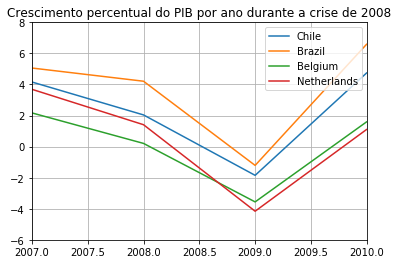

In [458]:
plt.plot(dados_escolhidos.iloc[2,:-2], label = 'Chile')
plt.plot(dados_escolhidos.iloc[1,:-2], label = 'Brazil')
plt.plot(dados_escolhidos.iloc[0,:-2], label = 'Belgium')
plt.plot(dados_escolhidos.iloc[3,:-2], label = 'Netherlands')
plt.title('Crescimento percentual do PIB por ano durante a crise de 2008')
plt.legend(loc = 'upper right')
plt.axis([2007, 2010, -6,8])
plt.grid()

A partir da análise do gráfico, é possível constatar que durante o estopim da crise (cerca de 2009), todos os países apresentaram queda significativa do crescimento anual do PIB, independentemente do bloco a qual pertence. Além disso, é notável que pós-2009, as nações apresentaram um rápido aumento da taxa de crescimento do PIB.

Vamos analisar agora qual país foi mais prejudicado durante a crise e qual se recuperou melhor após o seu término.

In [459]:
data_média = {'Brazil': [-1.21,6.6],'Chile': [-1.85,4.75],'Belgium': [-3.56,1.6],'Netherlands': [-4.16,1.1]}
dados_média = pd.DataFrame.from_dict(data_média, orient='index',columns = ['2009','2010'])

O gráfico a seguir representa a taxa de crescimento do país durante a crise (em vermelho) e após a crise (em verde). Dessa forma, é possível realizar uma análise sobre como os países se comportaram após a crise.

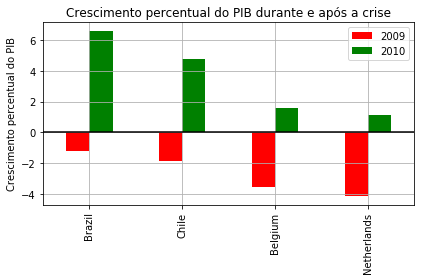

In [460]:
dados_média.plot(kind='bar', color=('red', 'green'))
plt.ylabel('Crescimento percentual do PIB')
plt.title('Crescimento percentual do PIB durante e após a crise')
plt.grid()
plt.tight_layout()
plt.axhline(y=0,color='black')

Notadamente, o Brasil foi o país que apresentou o maior crescimento pós o fim da crise. Em compensação, a Holanda foi a nação que apresentou a menor taxa de crescimento pós-2009.

Para facilitar a visualização dos dados, juntaremos os dois dados, apresentando assim, uma taxa média de crescimento de cada país durante e após a crise de 2008.

In [461]:
data_recuperação = {'Brazil': [3.905],'Chile': [3.3],'Belgium': [2.58],'Netherlands': [2.63]}
dados_recuperacao = pd.DataFrame.from_dict(data_recuperação, orient='index', columns = ['"Taxa de recuperação"'])

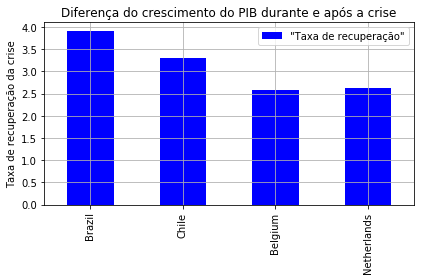

In [469]:
dados_recuperacao.plot(kind='bar', color=('blue'))
plt.ylabel('Taxa de recuperação da crise')
plt.title('Diferença do crescimento do PIB durante e após a crise')
plt.tight_layout()
plt.grid()

O gráfico acima apresenta, explicitamente, a maneira como cada país reagiu à crise de 2008. É possível constatar que, dentre os 4, o Brasil foi o que apresentou melhor reação, sendo seguido por Chile, Holanda e Bélgica.

#### Taxa de emprego

Para o dado de taxa de emprego, realizaremos o mesmo processo, começando pela limitação da linha temporal para a faixa de anos em que ocorreu a crise

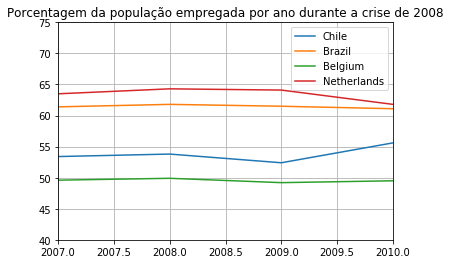

In [463]:
plt.plot(dados_escolhidos_emp.iloc[2,:-2], label = 'Chile')
plt.plot(dados_escolhidos_emp.iloc[1,:-2], label = 'Brazil')
plt.plot(dados_escolhidos_emp.iloc[0,:-2], label = 'Belgium')
plt.plot(dados_escolhidos_emp.iloc[3,:-2], label = 'Netherlands')
plt.title('Porcentagem da população empregada por ano durante a crise de 2008')
plt.legend(loc = 'upper right')
plt.axis([2007, 2010, 40,75])
plt.grid()

Diferentemente dos valores de crescimento percentual do PIB, os dados de taxa de emprego pouco variaram durante os anos da crise imobiliária de 2008. Tomando como exemplo Brasil e Bélgica, é quase inperceptível a mudança dos valores.

Para que seja possível visualizar detalhadamente os dados, criaremos um gráfico de barras como foi feito com o indicador anterior:

In [464]:
data_média_emp = {'Brazil': [61.5,61.1],'Chile': [52.4,55.6],'Belgium': [49.2,49.5],'Netherlands': [64.1,61.8]}
dados_média_emp = pd.DataFrame.from_dict(data_média_emp, orient='index',columns = ['Durante','Pós'])

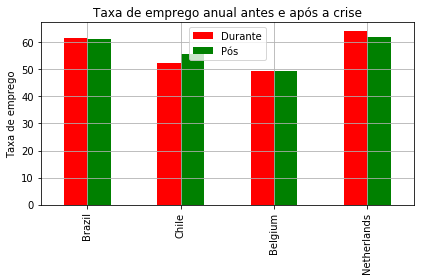

In [470]:
dados_média_emp.plot(kind='bar', color=('red', 'green'))
plt.ylabel('Taxa de emprego')
plt.title('Taxa de emprego anual antes e após a crise')
plt.grid()
plt.tight_layout()

É importante notar que os valores da taxa de emprego durante e pós-crise são realmente muito próximos, o que dificulta a visualização do gráfico. Por esse motivo, criaremos mais um gráfico com a diferença da taxa de emprego nos dois momentos em questão (durante a crise e após a crise):

In [466]:
data_recuperação_emp = {'Brazil': [-0.4],'Chile': [3.2],'Belgium': [0.3],'Netherlands': [0.7]}
dados_recuperacao_emp = pd.DataFrame.from_dict(data_recuperação_emp, orient='index', columns = ['Taxa'])

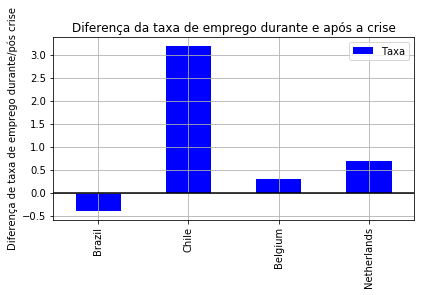

In [471]:
dados_recuperacao_emp.plot(kind='bar', color=('blue'))
plt.ylabel('Diferença de taxa de emprego durante/pós crise')
plt.title('Diferença da taxa de emprego durante e após a crise')
plt.axhline(y=0,color='black')
plt.tight_layout()
plt.grid()

Esse gráfico explicita, de maneira mais clara, o comportamento de cada nação no intervalo da crise de 2008. Apesar do Brasil ter apresentado o maior crescimento no auge da crise a após a mesma, a nação apresentou um decréssimo da taxa de emprego.

Por outro lado, o Chile se destacou nesse quesito, apresentando um aumento de mais de 3% na taxa de emprego. Já os países da UE, apresentaram um acréssimo de cerca de 0.5% em sua taxa.

## Conclusão

A crise dos Tigres Asiáticos de 1997 revelou que os países do Mercosul foram muito mais afetados pela recessão nos Tigres Asiáticos. Isso pode significar que os países sul-americanos dependiam mais da economia daqueles países e por isso, foram mais afetados pela crise financeira asiática.

Ao estudar a crise de 2008, no entanto, nos deparamos com uma situação peculiar. Diferentemente do esperado, os países da União Europeia foram muito mais afetados pela crise imobiliária. Tanto Bélgica como Holanda, apresentaram uma maior queda percentual do crescimento do PIB, enquanto Brasil e Chile demonstraram uma maior capacidade de recuperação.

Analisando esses fatos, é possível concluir que a hipótese inicial era falha. Diferentemente do esperado, os países da União Europeia não apresentaram um menor impacto pelas crises. Pelo contrário, estes tenderam a ser mais atingidos, principalmente pela crise de 2008. Apesar da taxa de emprego ter variado de maneira quase que insignificante, a taxa de crescimento do PIB variou de forma extremamente considerável.

Apesar do grupo apresentar maiores facilidades comerciais como moeda unificada e um mercado comum forte, os países da União Europeia ainda apresentam certa fragilidade com a ocorrência de crises econômicas que afetam a economia mundial.